<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/Fuzzy(tt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-88-7816f7fbe4ec>:48: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 7, cmap = 'viridis', anpha = 0.5)
<ipython-input-88-7816f7fbe4ec>:49: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-88-7816f7fbe4ec>:50: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


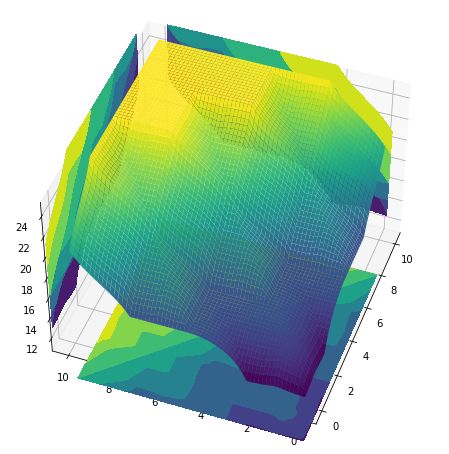

In [ ]:
# Food, Service, Tip
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 
universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe,'Food')
service = ctrl.Antecedent(universe,'Service')
tip = ctrl.Consequent(universe1,'Tip')
names = ['VP','P','AV','G','VG']
namesTip = ['L','N','M']
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names)

rule0= ctrl.Rule(antecedent = ((food['VP'] & service['VP'])|(food['P'] & service['VP'])
|(food['VP'] & service['P'])), consequent= tip['VP'], label = 'ruleVP')

rule1 = ctrl.Rule(antecedent=((food['VP'] & service['AV'])|(food['VP'] & service['G'])
|(food['P'] & service['P'])|(food['P'] & service['AV'])|(food['AV'] & service['VP'])
|(food['AV'] & service['P'])|(food['G'] & service['VP'])), consequent = tip['P'], label = 'ruleP')

rule2 = ctrl.Rule(antecedent = ((food['VP']&service['VG'])|(food['P']&service['G'])
|(food['AV']&service['AV'])|(food['G']&service['P'])|(food['VG']&service['VP'])), consequent = tip['AV'], label = 'ruleAV')

rule3 = ctrl.Rule(antecedent = ((food['P']&service['VG'])|(food['AV']&service['G'])
|(food['AV']&service['VG'])|(food['G']&service['AV'])|(food['G']&service['G'])|(food['VG']&service['P'])
|(food['VG']&service['AV'])), consequent = tip['G'], label = 'ruleG')

rule4 =ctrl.Rule(antecedent = ((food['G']&service['VG'])|(food['VG']&service['G'])
|(food['VG']&service['VG'])), consequent = tip['G'], label = 'ruleG')

system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,10,61)
x,y= np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['Food'] = x[i,j]
    sim.input['Service'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Tip']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 7, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(45,200)


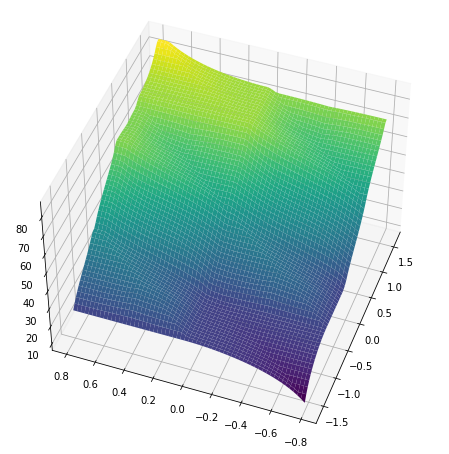

In [ ]:
#Con lắc ngược, alpha, d(alpha)/dt, force
import numpy as np
import math
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 

a = ctrl.Antecedent(np.arange(-np.pi/2,np.pi/2,0.1), 'a')
da = ctrl.Antecedent(np.arange(-np.pi/4,np.pi/4,0.1), 'da')
force = ctrl.Consequent(np.arange(-100,100,1), 'force')
# tao ham cho tung member
a['LN'] = fuzz.trimf(a.universe, [-np.pi/2,-np.pi/2,-np.pi/4])
a['N'] = fuzz.trimf(a.universe, [-np.pi/2,-np.pi/4,0])
a['ZE'] = fuzz.trimf(a.universe, [-np.pi/4,0,np.pi/4])
a['P'] = fuzz.trimf(a.universe, [0,np.pi/4,np.pi/2])
a['LP'] = fuzz.trimf(a.universe, [np.pi/4, np.pi/2, np.pi/2])

da['LN'] = fuzz.trimf(da.universe, [-np.pi/2,-np.pi/2,-np.pi/4])
da['N'] = fuzz.trimf(da.universe, [-np.pi/2,-np.pi/4,0])
da['ZE'] = fuzz.trimf(da.universe, [-np.pi/4,0,np.pi/4])
da['P'] = fuzz.trimf(da.universe, [0,np.pi/4,np.pi/2])
da['LP'] = fuzz.trimf(da.universe, [np.pi/4, np.pi/2, np.pi/2])

force['LN'] = fuzz.trimf(force.universe, [0,0,25])
force['N'] = fuzz.trimf(force.universe, [0,25,50])
force['ZE'] = fuzz.trimf(force.universe, [25,50,75])
force['P'] = fuzz.trimf(force.universe, [50,75,100])
force['LP'] = fuzz.trimf(force.universe, [75, 100, 100])


rule0 = ctrl.Rule(antecedent = ((a['LN']&da['LN'])|(a['LN']&da['N'])|(a['N']&da['LN'])), consequent = force['LN'], label = 'forceLN')
rule1 = ctrl.Rule(antecedent = ((a['LN']&da['ZE'])|(a['LN']&da['P'])|(a['N']&da['N'])|(a['N']&da['ZE'])|(a['ZE']&da['LN'])|(a['ZE']&da['N'])|(a['P']&da['LN'])), consequent = force['N'], label = 'forceN')
rule2 = ctrl.Rule(antecedent = ((a['LP']&da['LN'])|(a['P']&da['N'])|(a['ZE']&da['ZE'])|(a['N']&da['P'])|(a['LN']&da['LP'])), consequent = force['ZE'], label = 'forceZE')
rule3 = ctrl.Rule(antecedent = ((a['N']&da['LP'])|(a['ZE']&da['P'])|(a['ZE']&da['LP'])|(a['P']&da['ZE'])|(a['P']&da['P'])|(a['LP']&da['N'])|(a['LP']&da['ZE'])), consequent = force['P'], label = 'forceP')
rule4 = ctrl.Rule(antecedent = ((a['P']&da['LP'])|(a['LP']&da['P'])|(a['LP']&da['LP'])), consequent = force['LP'], label = 'forceLP')
system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])

sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(-np.pi/2,np.pi/2,61)
upsampled1 = np.linspace(-np.pi/4,np.pi/4,61)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['a'] = x[i,j]
    sim.input['da'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['force']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',linewidth = 0.4, antialiased = True)

ax.view_init(45,200)

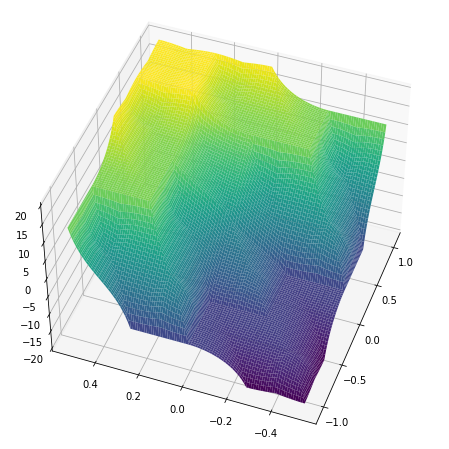

In [7]:
#StepMotor, error, d(error)/dt, voltage
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 
universe = np.linspace(-np.pi/3,np.pi/3,101)
universe1 = np.linspace(-np.pi/6,np.pi/6,101)
universe2 = np.linspace(-24,24,101)
# error and d(error)/dt
e = ctrl.Antecedent(universe,'Error')
de = ctrl.Antecedent(universe1, 'dError')
# voltage
v = ctrl.Consequent(universe2, 'Voltage')

names = ['VN','N','ZE','P','VP']
names1 = ['-H','-N','ZE', 'N', 'H']

e.automf(names = names)
de.automf(names = names)
v.automf(names = names1)

rule0 = ctrl.Rule(antecedent = ((e['VN']&de['VN'])
|(e['VN']&de['N'])|(e['N']&de['VN'])), consequent = v['-H'], label = '-H')

rule1 = ctrl.Rule(antecedent=((e['VN']&de['ZE'])|(e['VN']&de['P'])
|(e['N']&de['N'])|(e['N']&de['ZE'])|(e['ZE']&de['VN'])|(e['ZE']&de['N'])
|(e['P']&de['VN'])), consequent = v['-N'], label = '-N')

rule2 = ctrl.Rule(antecedent=(e['ZE']&de['ZE']), consequent= v['ZE'],
label = 'ZE')

rule3 = ctrl.Rule(antecedent=((e['VN']&de['VP'])|(e['N']&de['P'])
|(e['N']&de['VP'])|(e['ZE']&de['P'])|(e['P']&de['N'])|(e['P']&de['ZE'])
|(e['VP']&de['VN'])|(e['VP']&de['N'])), consequent = v['N'],
label = 'N')

rule4 = ctrl.Rule(antecedent = ((e['ZE']&de['VP'])|(e['P']&de['P'])
|(e['P']&de['VP'])|(e['VP']&de['ZE'])|(e['VP']&de['P'])
|(e['VP']&de['VP'])), consequent = v['H'], label = 'H')

system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])

sim = ctrl.ControlSystemSimulation(system, flush_after_run = 101*101+1)
upsampled = np.linspace(-np.pi/3,np.pi/3,101)
upsampled1 = np.linspace(-np.pi/6,np.pi/6,101)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(101):
  for j in range(101):
    sim.input['Error'] = x[i,j]
    sim.input['dError'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Voltage']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)

ax.view_init(45,200)

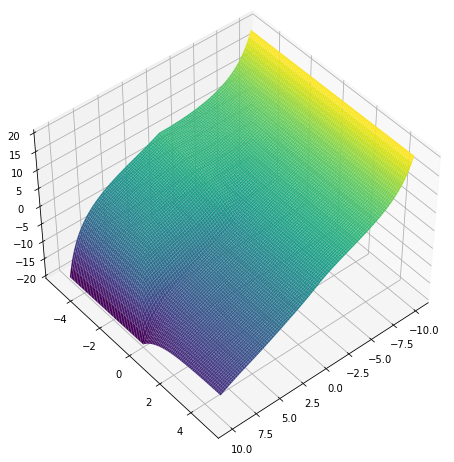

In [19]:
# Bồn nước

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(-10,10,101)
universe1 = np.linspace(-5,5,101)
universe2 = np.linspace(-24,24,101)
# level and d(level)/dt
level = ctrl.Antecedent(universe,'Level')
dlevel = ctrl.Antecedent(universe1, 'dLevel')
# valve
valve = ctrl.Consequent(universe2, 'Valve')

names = ['L', 'OK', 'H']
names1 = ['N','OK','P']
names2 =['HC','SC', 'NC','SO', 'HO']

level.automf(names = names)
dlevel.automf(names = names1)
valve.automf(names = names2)


rule0 = ctrl.Rule(antecedent = level['H'], consequent = valve['HC'], label = 'HC')
rule1 = ctrl.Rule(antecedent = level['H']&dlevel['P'], consequent = valve['SC'], label = 'SC')
rule2 = ctrl.Rule(antecedent = level['OK'], consequent = valve['NC'], label = 'NC')
rule3 = ctrl.Rule(antecedent = level['OK']&dlevel['N'], consequent = valve['SO'], label = 'SO')
rule4 = ctrl.Rule(antecedent = level['L'], consequent = valve['HO'], label = 'HO')

system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])

sim = ctrl.ControlSystemSimulation(system, flush_after_run = 101*101+1)
upsampled = np.linspace(-10,10,101)
upsampled1 = np.linspace(-5,5,101)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(101):
  for j in range(101):
    sim.input['Level'] = x[i,j]
    sim.input['dLevel'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Valve']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)

ax.view_init(45,50)

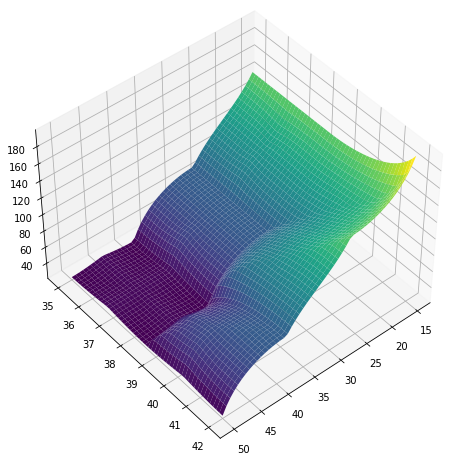

In [30]:
#Điều khiển nhiệt độ

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(15,50,51)
universe1 = np.linspace(35,42,51)
universe2 = np.linspace(0,220,101)
# temperature and humidity
temperature = ctrl.Antecedent(universe,'Temperature')
humidity = ctrl.Antecedent(universe1, 'Humidity')
# fan
fan = ctrl.Consequent(universe2, 'Fan')

names = ['CD','CL' ,'W', 'H']
names1 = ['L','M','H']
names2 =['Z','L', 'MD','H']

temperature.automf(names = names)
humidity.automf(names = names1)
fan.automf(names = names2)


rule1 = ctrl.Rule(antecedent = temperature['CD']&humidity['H'], consequent = fan['H'])
rule2 = ctrl.Rule(antecedent = temperature['CL']&humidity['H'], consequent = fan['MD'])
rule3 = ctrl.Rule(antecedent = temperature['W']&humidity['H'], consequent = fan['L'])
rule4 = ctrl.Rule(antecedent = temperature['H']&humidity['H'], consequent = fan['Z'])

rule5 = ctrl.Rule(antecedent = temperature['CD']&humidity['M'], consequent = fan['MD'])
rule6 = ctrl.Rule(antecedent = temperature['CL']&humidity['M'], consequent = fan['L'])
rule7 = ctrl.Rule(antecedent = temperature['W']&humidity['M'], consequent = fan['Z'])
rule8 = ctrl.Rule(antecedent = temperature['H']&humidity['M'], consequent = fan['Z'])

rule9 = ctrl.Rule(antecedent = temperature['CD']&humidity['L'], consequent = fan['MD'])
rule10 = ctrl.Rule(antecedent = temperature['CL']&humidity['L'], consequent = fan['L'])
rule11 = ctrl.Rule(antecedent = temperature['W']&humidity['L'], consequent = fan['Z'])
rule12 = ctrl.Rule(antecedent = temperature['H']&humidity['L'], consequent = fan['Z'])

system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

sim = ctrl.ControlSystemSimulation(system, flush_after_run = 101*101+1)
upsampled = np.linspace(15,50,51)
upsampled1 = np.linspace(35,42,51)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(51):
  for j in range(51):
    sim.input['Temperature'] = x[i,j]
    sim.input['Humidity'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Fan']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)

ax.view_init(45,50)

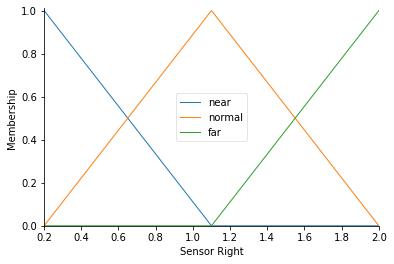

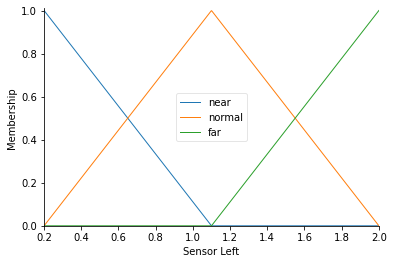

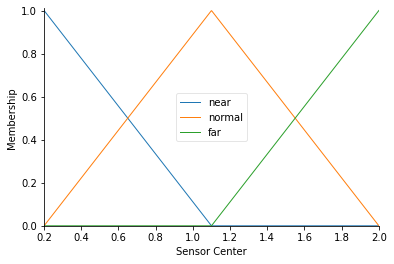

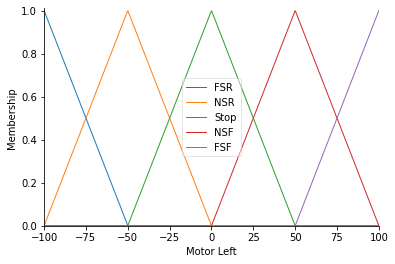

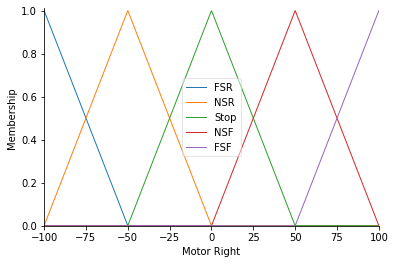

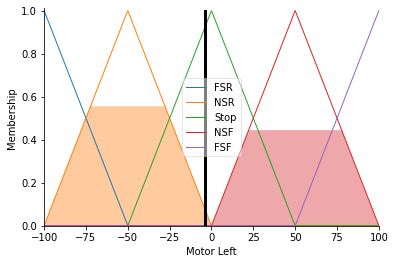

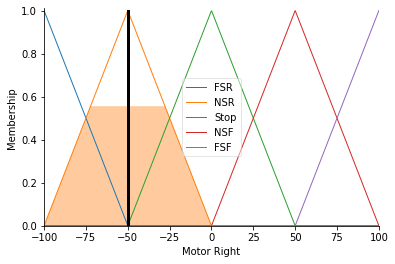

In [ ]:
#MobileRobot, sensor left, sensor right, sensor center, motorleft, motorright
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universeSS = np.linspace(0.2,2,1000)
universeM = np.linspace(-100,100,1000)

#Input
SR=ctrl.Antecedent(universeSS,'Sensor Right')
SL=ctrl.Antecedent(universeSS,'Sensor Left')
SC=ctrl.Antecedent(universeSS,'Sensor Center')
#Output
ML=ctrl.Consequent(universeM,'Motor Left')
MR=ctrl.Consequent(universeM,'Motor Right')

nameSS=['near','normal','far']
nameM=['FSR','NSR','Stop','NSF','FSF']

SR.automf(names=nameSS)
SL.automf(names=nameSS)
SC.automf(names=nameSS)
ML.automf(names=nameM)
MR.automf(names=nameM)

ruleML = []
ruleMR = []
#Rule ML
ruleML.append(ctrl.Rule(antecedent=((SL['far'] & SC['far']& SR['far'])|(SL['normal'] & SC['far']& SR['far'])|(SL['normal'] & SC['far']& SR['normal'])|
                                  (SL['normal'] & SC['far']& SR['near'])|(SL['near'] & SC['far']& SR['far'])|(SL['near'] & SC['far']& SR['normal'])|
                                  (SL['near'] & SC['far']& SR['near'])),consequent=ML['FSF'],label='rule FSF'))
ruleML.append(ctrl.Rule(antecedent=((SL['far'] & SC['normal']& SR['far'])|(SL['far'] & SC['far']& SR['normal'])|(SL['far'] & SC['normal']& SR['normal'])|
                                  (SL['normal'] & SC['normal']& SR['far'])|(SL['normal'] & SC['near']& SR['far'])|(SL['normal'] & SC['near']& SR['normal'])|
                                  (SL['near'] & SC['normal']& SR['far'])|(SL['near'] & SC['near']& SR['far'])|(SL['near'] & SC['normal']& SR['normal'])|
                                  (SL['near'] & SC['normal']& SR['near'])|(SL['near'] & SC['near']& SR['normal'])),consequent=ML['NSF'],label='rule NSF'))
ruleML.append(ctrl.Rule(antecedent=((SL['far'] & SC['far']& SR['near'])|(SL['far'] & SC['near']& SR['far'])|(SL['far'] & SC['near']& SR['normal'])|
                                  (SL['far'] & SC['normal']& SR['near'])|(SL['far'] & SC['near']& SR['near'])|(SL['normal'] & SC['normal']& SR['normal'])|
                                  (SL['normal'] & SC['normal']& SR['near'])|(SL['normal'] & SC['near']& SR['near'])),consequent=ML['NSR'],label='rule NSR'))
ruleML.append(ctrl.Rule(antecedent=((SL['near'] & SC['near']& SR['near'])),consequent=ML['FSR'],label='rule FSR'))
#Rule MR
ruleMR.append(ctrl.Rule(antecedent=((SL['far'] & SC['far']& SR['far'])|(SL['far'] & SC['far']& SR['normal'])|(SL['far'] & SC['normal']& SR['normal'])|
                                  (SL['normal'] & SC['far']& SR['normal'])|(SL['normal'] & SC['far']& SR['near'])|(SL['near'] & SC['far']& SR['normal'])|
                                  (SL['near'] & SC['far']& SR['near'])),consequent=MR['FSF'],label='rule FSF'))
ruleMR.append(ctrl.Rule(antecedent=((SL['far'] & SC['normal']& SR['far'])|(SL['far'] & SC['far']& SR['near'])|(SL['far'] & SC['near']& SR['far'])|
                                  (SL['far'] & SC['near']& SR['normal'])|(SL['far'] & SC['normal']& SR['near'])|(SL['far'] & SC['near']& SR['near'])|
                                  (SL['normal'] & SC['far']& SR['far'])|(SL['normal'] & SC['normal']& SR['near'])|(SL['normal'] & SC['near']& SR['near'])|
                                  (SL['near'] & SC['far']& SR['far'])|(SL['near'] & SC['normal']& SR['near'])),consequent=MR['NSF'],label='rule NSF'))
ruleMR.append(ctrl.Rule(antecedent=((SL['normal'] & SC['normal']& SR['far'])|(SL['normal'] & SC['near']& SR['far'])|(SL['normal'] & SC['normal']& SR['normal'])|
                                  (SL['normal'] & SC['near']& SR['normal'])|(SL['near'] & SC['normal']& SR['far'])|(SL['near'] & SC['near']& SR['far'])|
                                  (SL['near'] & SC['normal']& SR['normal'])|(SL['near'] & SC['near']& SR['normal'])),consequent=MR['NSR'],label='rule NSR'))
ruleMR.append(ctrl.Rule(antecedent=((SL['near'] & SC['near']& SR['near'])),consequent=MR['FSR'],label='rule FSR'))

#Control system
motorL_ctrl = ctrl.ControlSystem(ruleML)
motorL_simulation=ctrl.ControlSystemSimulation(motorL_ctrl)
motorR_ctrl = ctrl.ControlSystem(ruleMR)
motorR_simulation=ctrl.ControlSystemSimulation(motorR_ctrl)
# Compute
motorL_simulation.input['Sensor Right'] = motorR_simulation.input['Sensor Right'] = 1.5
motorL_simulation.input['Sensor Left'] = motorR_simulation.input['Sensor Left'] = 0.8
motorL_simulation.input['Sensor Center'] = motorR_simulation.input['Sensor Center'] = 0.8

motorR_simulation.compute()
motorL_simulation.compute()

SR.view()
SL.view()
SC.view()
ML.view()
MR.view()

# power
ML.view(sim = motorL_simulation)
MR.view(sim = motorR_simulation)


